# 데이터 로드

In [ ]:
!git clone https://github.com/e9t/nsmc/

Cloning into 'nsmc'...
remote: Enumerating objects: 14763, done.
remote: Total 14763 (delta 0), reused 0 (delta 0), pack-reused 14763
Receiving objects: 100% (14763/14763), 56.19 MiB | 15.79 MiB/s, done.
Resolving deltas: 100% (1749/1749), done.
Checking out files: 100% (14737/14737), done.


In [ ]:
# 필요 프레임워크 및 라이브러리 준비
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request

In [ ]:
# 데이터 다운 로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7f8480d20a10>)

In [ ]:
# 판다스로 각 파일데이터를  train/test 변수에 바인딩
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [ ]:
# 변수에 바인딩된 데이터 개수 확인
print('훈련용 리뷰 개수 :',len(train_data)) # 훈련용 리뷰 개수 출력
print('테스트용 리뷰 개수 :',len(test_data))

훈련용 리뷰 개수 : 150000
테스트용 리뷰 개수 : 50000


In [ ]:
# 훈련 데이터 내용 확인
train_data[:] # 상위 5개 출력

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [ ]:
# 테스트 데이터 내용 확인
test_data[:] # 상위 5개 출력

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [ ]:
 # 데이터 통합
total_data = pd.concat([train_data, test_data])
print('통합 데이터 개수 :',len(total_data))

통합 데이터 개수 : 200000


In [ ]:
# 통합 데이터 확인
total_data[149996:150005]

,id,document,label
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1
149999,9619869,한국 영화 최초로 수간하는 내용이 담긴 영화,0
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [ ]:
 # shuffling하고 index reset
total_data = total_data.sample(frac=1).reset_index(drop=True) 

In [ ]:
# 셔플한 통합 데이터 확인
total_data[149996:150005]

,id,document,label
149996,3422679,"보기 드문, 성찰이 담긴 프랑스 영화의 진수",1
149997,5877203,성숙한 영혼이 안내하는 올바른 인생길...종교를 떠나 아름답다...,1
149998,7432838,중반이후 별루네요.. 막판도 흐지부지..,0
149999,5586517,재밌음 지루할틈이 없는영화..참리얼하다 캐릭들이 짜증나는면이있긴해도..,1
150000,7674852,극장에서 보기엔 돈 아깝다,0
150001,4208249,쓸쓸한 내면을 섬세하게 포착하고 있는 영화,1
150002,715121,제라드의 영화가 성공할 수 밖에 없는 이유가 여기이군요^^*,1
150003,7866843,홍상수 최초 각본 영화. 아직 스타일이 완전히 녹아있지 않아서 두개 에피소드의 링크...,0
150004,6313275,예쁘게 슬프다,1


# 데이터 클렌징

In [ ]:
# 중복 데이터 체크
total_data['document'].nunique(), total_data['label'].nunique()

(194543, 2)

In [ ]:
# 중복 데이터 제거
total_data.drop_duplicates(subset=['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거

In [ ]:
# 중복 샘플 제거 확인
print('총 샘플의 수 :',len(total_data))

총 샘플의 수 : 194544


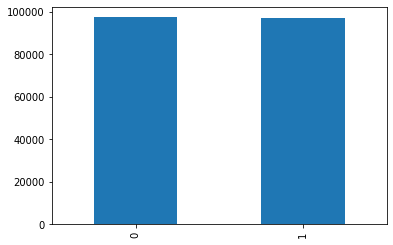

In [ ]:
# 훈련 데이터에서의 레이블 값의 분포 확인
total_data['label'].value_counts().plot(kind = 'bar')

In [ ]:
# 균일해보이지만 정확하게 몇개인지 확인해보자
print(total_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  97393
1      1  97151


In [ ]:
# 0이 근소하게 많음, Null값이 있는지 체크해보자
print(total_data.isnull().values.any())

True


In [ ]:
# 어느 열에 null값이 존재하는지 확인
print(total_data.isnull().sum())

id          0
document    1
label       0
dtype: int64


In [ ]:
# null값 데이터가 어느 인덱스 위치에 존재하는지 출력
total_data.loc[total_data.document.isnull()]

,id,document,label
20084,5026896,NaN,0


In [ ]:
# Null 값 제거
total_data = total_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(total_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [ ]:
# null데이터 제거된 샘플 개수 확인
print(len(total_data))

194543


# 데이터 정규화

In [ ]:
# 훈련데이터에 한글과 공백을 제외하고 모두 제거해보자
total_data['document'] = total_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
total_data[:5]

,id,document,label
0,537662,최윤영이 매력있게 나왔네,0
1,7325275,ㄴ,1
2,1356765,초사이어인이 된 홍길동,0
3,4533311,정말 최고의 다큐영화고 환경의 심각성을 다시 한번 알았다,1
4,4569236,이영환 다시재조명 되야한다이시절에 신은경이 이렇게아름다웟구나강추,1


In [ ]:
# 공백만 남은 데이터를 넓값으로 바꾸고 개수를 체크하자
total_data['document'] = total_data['document'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
total_data['document'].replace('', np.nan, inplace=True)
print(total_data.isnull().sum())

id             0
document    1025
label          0
dtype: int64


In [ ]:
# null값 행 출력
total_data.loc[total_data.document.isnull()][:5]

,id,document,label
68,9533913,NaN,1
284,6674064,NaN,0
411,2783665,NaN,1
437,7571939,NaN,1
451,6766499,NaN,1


In [ ]:
# null값 데이터 제거
total_data = total_data.dropna(how = 'any')
print(len(total_data))

193518


   label  count
0      0  97012
1      1  96506


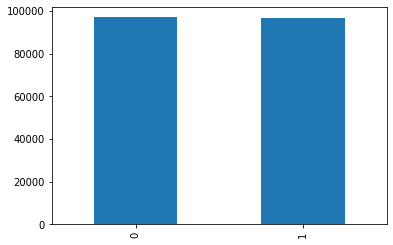

In [ ]:
# 훈련 데이터에서의 레이블 값의 분포 확인
total_data['label'].value_counts().plot(kind = 'bar')
print(total_data.groupby('label').size().reset_index(name = 'count'))

# 정제&정규화한 데이터 파일로 저장

In [ ]:
total_data.to_csv('naver_movie_review_total_data.txt', index=False, sep='\t')